# Data Science Intern @CodersCave Nov23
# Author: Viraj N. Bhutada
# *Project 1(Normal Task): Exploratory Data Analysis - Terrorism*
**Problem Statement**: 
 The goal of this project is to perform Exploratory Data Analysis (EDA) on the terrorism dataset to extract meaningful insights and patterns. By analyzing the dataset, we aim to uncover trends, identify high-risk regions, understand attack characteristics, and potentially reveal factors that contribute to terrorist activities.

Dataset :- https://www.kaggle.com/datasets/START-UMD/gtd

We have imported the necessary libraries for data analysis and visualization.

import pandas as pd: This line imports the pandas library and assigns it the alias "pd." Pandas is a popular library for data manipulation and analysis.

import numpy as np: This line imports the numpy library and assigns it the alias "np." NumPy is a library for numerical operations, and it is often used in conjunction with pandas for data manipulation.

import matplotlib.pyplot as plt: This line imports the pyplot module from the matplotlib library and assigns it the alias "plt." Matplotlib is a widely used library for creating static, animated, and interactive visualizations in Python.

%matplotlib inline: This is a Jupyter Notebook magic command that allows matplotlib to render plots directly within the notebook cells. It's not required in all Python environments but is commonly used in Jupyter Notebook or Jupyter Lab to display plots inline.

With these libraries imported and the inline plotting configured, we are all set to perform data analysis and create visualizations using pandas, numpy, and matplotlib in your Python environment

### Loading required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading Data

In [2]:
data=pd.read_csv("globalterrorism.csv")
data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139
0,197000000000,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,197000000000,1970,0,0,NaN,0,NaN,130,Mexico,1,...,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,197001000000,1970,1,0,NaN,0,NaN,160,Philippines,5,...,-9,-9,1,1,NaN,NaN,NaN,NaN,NaN,NaN
3,197001000000,1970,1,0,NaN,0,NaN,78,Greece,8,...,-9,-9,1,1,NaN,NaN,NaN,NaN,NaN,NaN
4,197001000000,1970,1,0,NaN,0,NaN,101,Japan,4,...,-9,-9,1,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712000000,2017,12,31,NaN,0,NaN,182,Somalia,11,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
181687,201712000000,2017,12,31,NaN,0,NaN,200,Syria,10,...,-9,-9,1,1,NaN,NaN,NaN,NaN,NaN,NaN
181688,201712000000,2017,12,31,NaN,0,NaN,160,Philippines,5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
181689,201712000000,2017,12,31,NaN,0,NaN,92,India,6,...,-9,-9,0,-9,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related', 'Unnamed: 135',
       'Unnamed: 136', 'Unnamed: 137', 'Unnamed: 138', 'Unnamed: 139'],
      dtype='object', length=140)

In [4]:
null_percentage=data.isna().sum().sort_values(ascending=False)/len(data)*100
null_percentage

Unnamed: 139        99.999450
Unnamed: 138        99.998349
Unnamed: 137        99.989543
gsubname3           99.987892
weapsubtype4_txt    99.960923
                      ...    
crit3                0.000000
attacktype1          0.000000
attacktype1_txt      0.000000
iyear                0.000000
eventid              0.000000
Length: 140, dtype: float64

### Dropoing columns having null values more than 80%

In [5]:
columns_to_drop=null_percentage[null_percentage>20].index

df=data.drop(columns=columns_to_drop,axis=1)
df

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000000,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,1,0.0,0.0,0,PGIS,0,0,0,0
1,197000000000,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,0,0.0,0.0,1,PGIS,0,1,1,1
2,197001000000,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,1,0.0,0.0,0,PGIS,-9,-9,1,1
3,197001000000,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Unknown Explosive Type,NaN,NaN,1.0,0,PGIS,-9,-9,1,1
4,197001000000,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,1.0,0,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712000000,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,Unknown Gun Type,1,2.0,-9.0,0,START Primary Collection,0,0,0,0
181687,201712000000,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,"Projectile (rockets, mortars, RPGs, etc.)",2,7.0,1.0,0,START Primary Collection,-9,-9,1,1
181688,201712000000,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,Arson/Fire,0,0.0,1.0,0,START Primary Collection,0,0,0,0
181689,201712000000,2017,12,31,0,92,India,6,South Asia,Manipur,...,Grenade,0,0.0,-9.0,0,START Primary Collection,-9,-9,0,-9


In [6]:
null_percentage=df.isna().sum().sort_values(ascending=False)/len(df)*100
null_percentage

weapsubtype1_txt    11.425992
weapsubtype1        11.401225
nwound              10.452912
targsubtype1_txt     5.708043
targsubtype1         5.703640
nkill                5.632640
longitude            2.508104
latitude             2.507554
dbsource             2.058990
ishostkid            1.958270
property             1.741418
natlty1              0.860802
natlty1_txt          0.858050
target1              0.352797
individual           0.328580
weaptype1            0.319774
guncertain1          0.287851
INT_LOG              0.255379
gname                0.244921
city                 0.238867
provstate            0.231712
targtype1            0.151356
multiple             0.114480
INT_IDEO             0.046783
weaptype1_txt        0.039628
targtype1_txt        0.012659
success              0.008806
INT_MISC             0.003302
specificity          0.003302
doubtterr            0.000550
INT_ANY              0.000550
eventid              0.000000
iyear                0.000000
attacktype

In [7]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname',
       'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nwound', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

### Renaming and selecting useful columns

In [8]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','city':'City','latitude':'Latitude','longitude':'Longitude','country_txt':'Country','provstate':'State','region_txt':'Region','attacktype1':'Attack_Type','target1':'Target','nkill':'Killed','nwound':'Wounded','gname':'Group','targtype1_txt':'Target_Type','weaptype1':'Weapon_Type'},inplace=True)

In [9]:
df=df[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude','Attack_Type','Target','Killed','Wounded','Group','Target_Type','Weapon_Type']]
df

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attack_Type,Target,Killed,Wounded,Group,Target_Type,Weapon_Type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,Julio Guzman,1,0.0,MANO-D,Private Citizens & Property,13.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,6,"Nadine Chaval, daughter",0,0.0,23rd of September Communist League,Government (Diplomatic),13.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,1,Employee,1,0.0,Unknown,Journalists & Media,13.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,3,U.S. Embassy,NaN,NaN,Unknown,Government (Diplomatic),6.0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,7,U.S. Consulate,NaN,NaN,Unknown,Government (Diplomatic),8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,2,Checkpoint,1,2.0,Al-Shabaab,Military,5.0
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,3,Hmeymim Air Base,2,7.0,Muslim extremists,Military,6.0
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,7,Houses,0,0.0,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,8.0
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,3,Office,0,0.0,Unknown,Government (General),6.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   Attack_Type  181691 non-null  int64  
 10  Target       181050 non-null  object 
 11  Killed       171457 non-null  object 
 12  Wounded      162699 non-null  object 
 13  Group        181246 non-null  object 
 14  Target_Type  181668 non-null  object 
 15  Weapon_Type  181110 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 22.2+ MB


In [11]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Attack_Type
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000
mean,2002.638997,6.467277,15.505650,23.498343,-4.586957e+02,3.242687
std,13.259430,3.388303,8.814043,18.569242,2.047790e+05,1.918507
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,2.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,3.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,3.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,9.000000


In [12]:
df.isna().sum()

Year               0
Month              0
Day                0
Country            0
State            421
Region             0
City             434
Latitude        4556
Longitude       4557
Attack_Type        0
Target           641
Killed         10234
Wounded        18992
Group            445
Target_Type       23
Weapon_Type      581
dtype: int64

### Total number of people killed

In [13]:
df['Killed']=pd.to_numeric(df['Killed'],errors='coerce')
df['Killed'].fillna(0,inplace=True)
df['Killed'].sum()

398058.0

### People Killed per Year

In [14]:
killed_by_year = df.groupby('Year')['Killed'].sum().reset_index()
killed_by_year

,Year,Killed
0,1970,163.0
1,1971,169.0
2,1972,530.0
3,1973,295.0
4,1974,489.0
5,1975,536.0
6,1976,593.0
7,1977,337.0
8,1978,1360.0
9,1979,1745.0


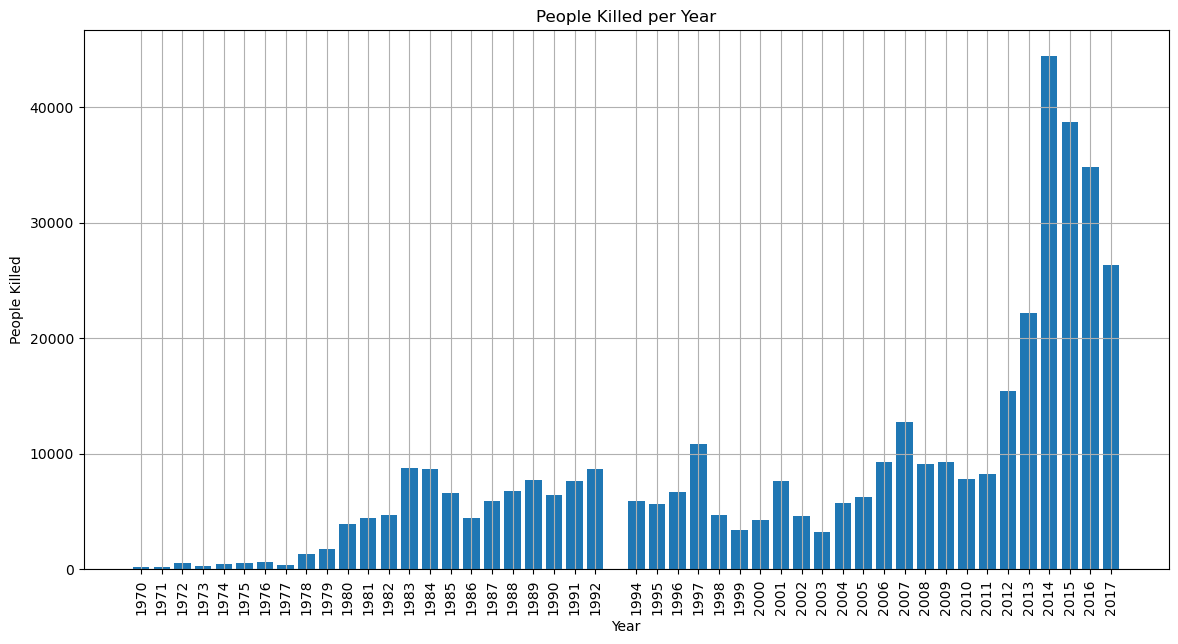

In [15]:
plt.figure(figsize=(14, 7))
plt.bar(killed_by_year['Year'], killed_by_year['Killed'])
plt.xlabel('Year')
plt.ylabel('People Killed')
plt.title('People Killed per Year')
plt.xticks(killed_by_year['Year'],rotation=90)
plt.grid()
plt.show()

### Total number of people wounded

In [16]:
df['Wounded']=pd.to_numeric(df['Wounded'],errors='coerce')
df['Wounded'].fillna(0,inplace=True)
df['Wounded'].sum()

513125.0

### People wounded per Year

In [17]:
wounded_by_year = df.groupby('Year')['Wounded'].sum().reset_index()
wounded_by_year

,Year,Wounded
0,1970,211.0
1,1971,82.0
2,1972,319.0
3,1973,400.0
4,1974,788.0
5,1975,593.0
6,1976,697.0
7,1977,495.0
8,1978,1443.0
9,1979,2362.0


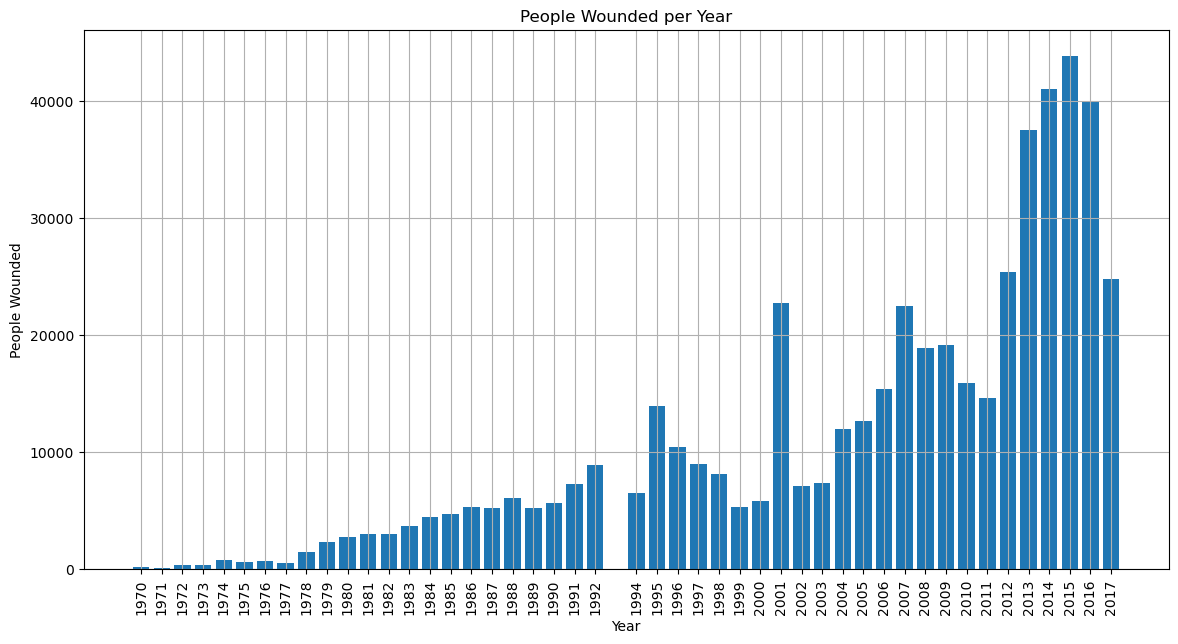

In [18]:
plt.figure(figsize=(14, 7))
plt.bar(wounded_by_year['Year'], wounded_by_year['Wounded'])
plt.xlabel('Year')
plt.ylabel('People Wounded')
plt.title('People Wounded per Year')
plt.xticks(wounded_by_year['Year'],rotation=90)
plt.grid()
plt.show()

### Top 3 countries with most attacks

In [19]:
df['Country'].value_counts().sort_values(ascending=False)[0:3]

Iraq           24636
Pakistan       14368
Afghanistan    12731
Name: Country, dtype: int64

### Top 3 states with most attacks

In [20]:
df['State'].value_counts().sort_values(ascending=False)[0:3]

Baghdad             7645
Northern Ireland    4498
Unknown             4290
Name: State, dtype: int64

### Top 3 cities with most attacks

In [21]:
df['City'].value_counts().sort_values(ascending=False)[0:3]

Unknown    9775
Baghdad    7589
Karachi    2652
Name: City, dtype: int64

### Top 3 regions with most attacks

In [22]:
df['Region'].value_counts().sort_values(ascending=False)[0:3]

Middle East & North Africa    50474
South Asia                    44974
South America                 18978
Name: Region, dtype: int64

### Top 3 years with most attacks

In [23]:
df['Year'].value_counts().sort_values(ascending=False)[0:3]

2014    16903
2015    14965
2016    13587
Name: Year, dtype: int64

### Top 3 months with most attacks

In [24]:
df['Month'].value_counts().sort_values(ascending=False)[0:3]

5    16875
7    16268
8    15800
Name: Month, dtype: int64

### Top 3 groups with most attacks

In [25]:
df['Group'].value_counts().sort_values(ascending=False)[0:3]

Unknown                                        82661
Taliban                                         7465
Islamic State of Iraq and the Levant (ISIL)     5606
Name: Group, dtype: int64

### Top 3 most attack types

In [26]:
df['Attack_Type'].value_counts().sort_values(ascending=False)[0:3]

3    88112
2    42586
1    19329
Name: Attack_Type, dtype: int64

### Distribution of numerical variables

<function matplotlib.pyplot.show(close=None, block=None)>

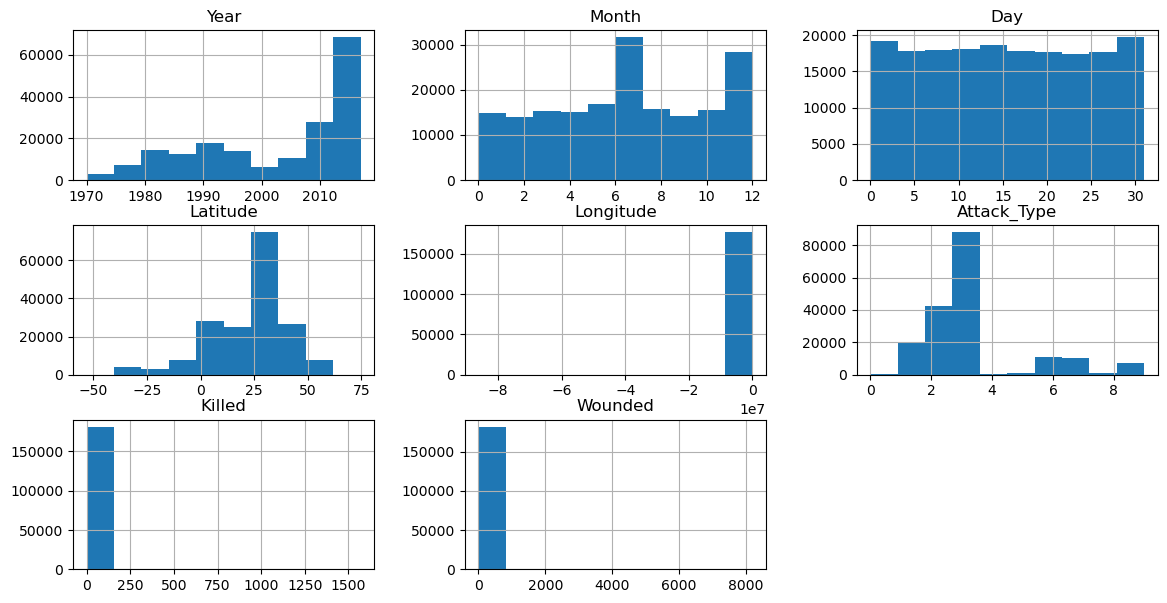

In [27]:
df.hist(figsize=(14,7))
plt.show

### Number of terrorist activities per year

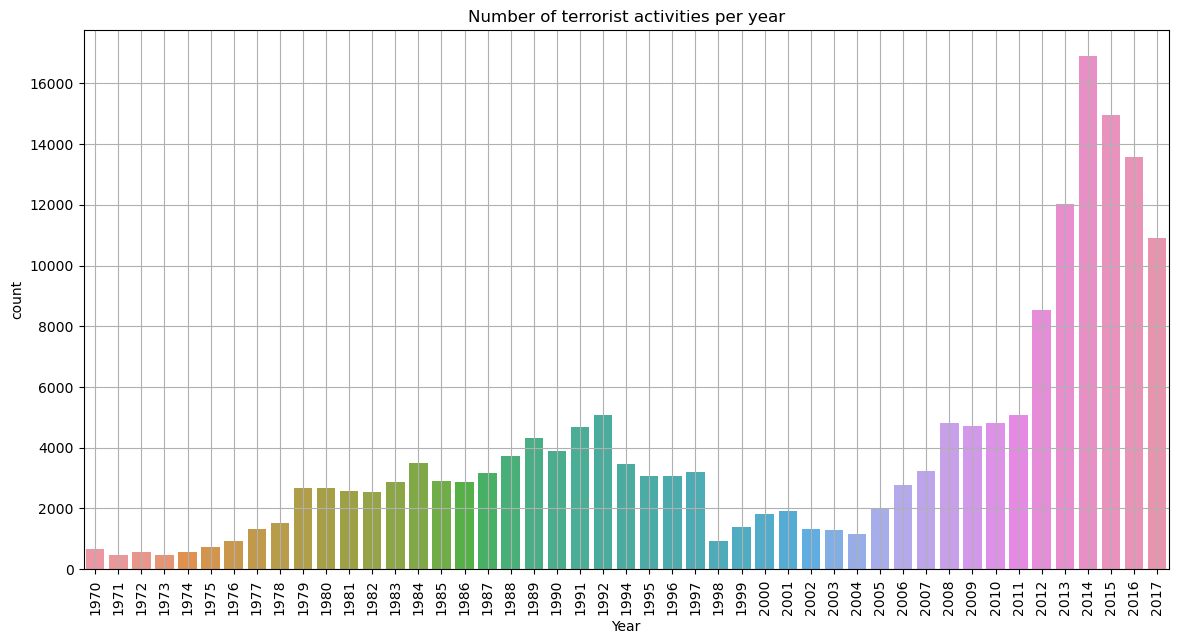

In [28]:
plt.subplots(figsize=(14,7))
sns.countplot(x='Year',data=df)
plt.title('Number of terrorist activities per year')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.grid()
plt.show()

### Number of terrorist activities per country

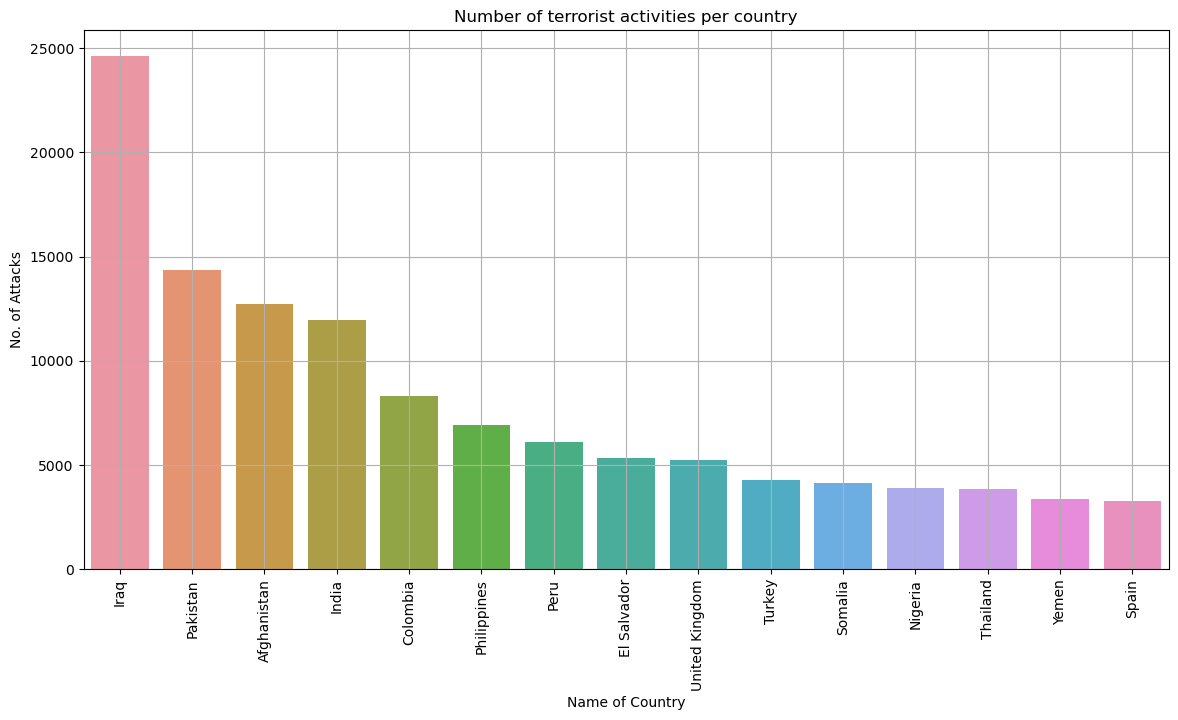

In [29]:
x_axis=df['Country'].value_counts()[0:15].index
y_axis=df['Country'].value_counts()[0:15].values

plt.figure(figsize=(14,7))
sns.barplot(x=x_axis,y=y_axis)
plt.title('Number of terrorist activities per country')
plt.xticks(rotation=90)
plt.xlabel('Name of Country')
plt.ylabel('No. of Attacks')
plt.grid()
plt.show()

### Number of terrorist activities per region

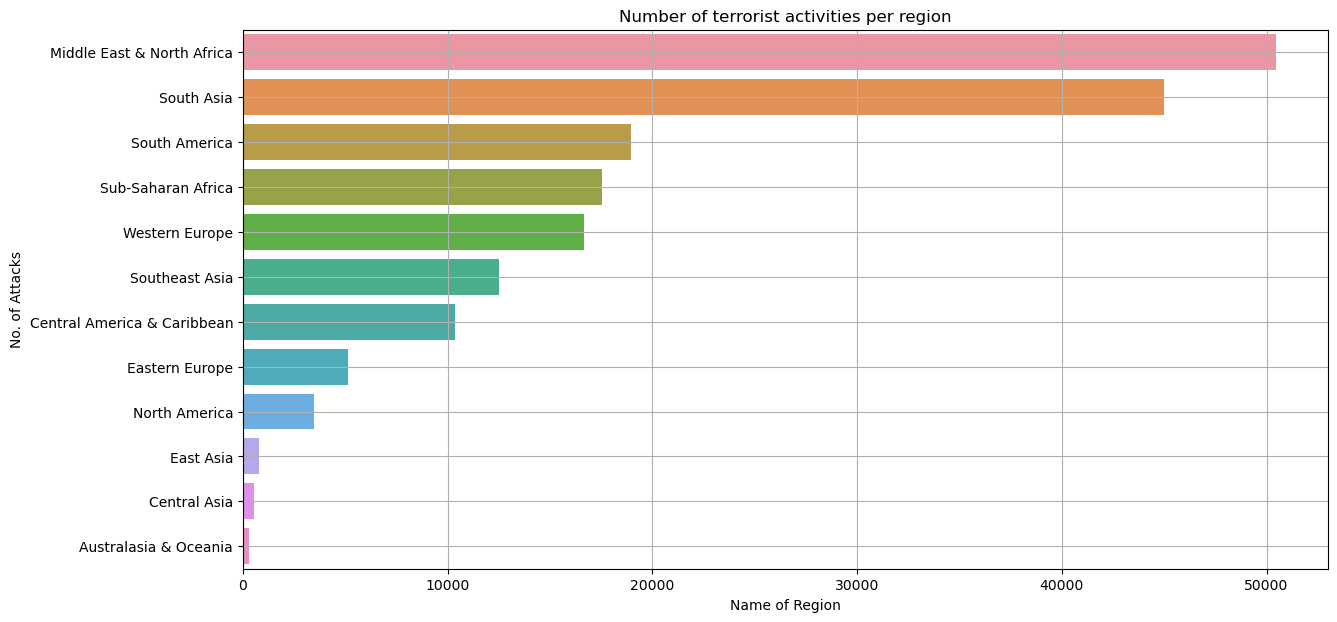

In [30]:
x_axis=df['Region'].value_counts().values
y_axis=df['Region'].value_counts().index

plt.figure(figsize=(14,7))
sns.barplot(x=x_axis,y=y_axis)
plt.title('Number of terrorist activities per region')
plt.xlabel('Name of Region')
plt.ylabel('No. of Attacks')
plt.grid()
plt.show()

### Terrorist activities by region in each year

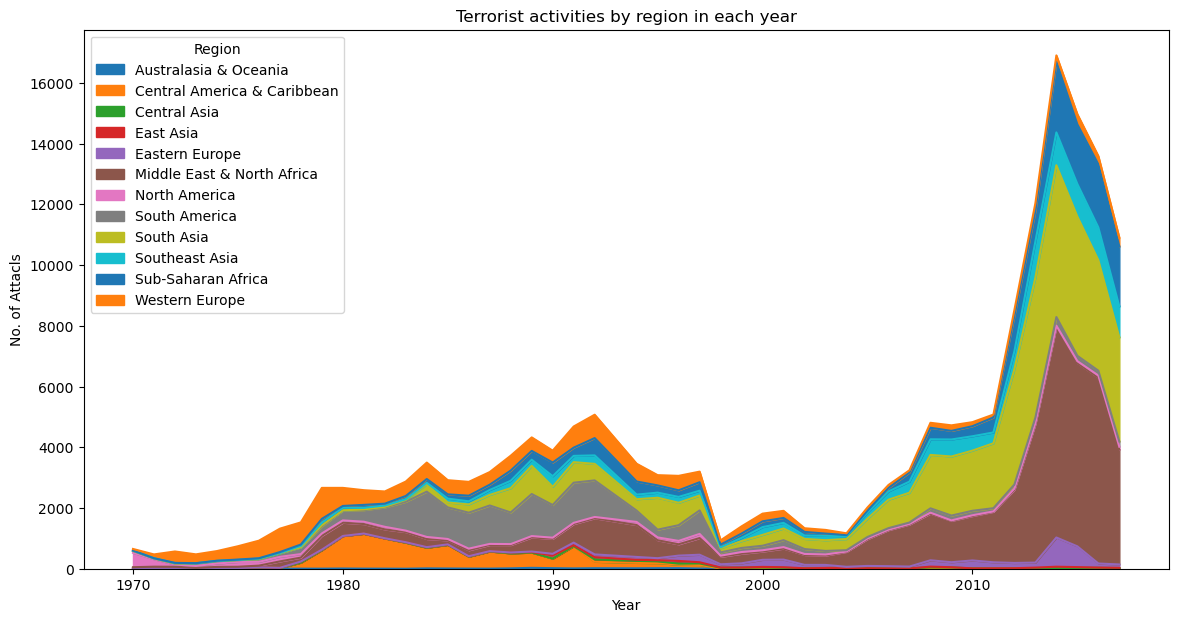

In [31]:
pd.crosstab(df.Year,df.Region).plot(kind='area',figsize=(14,7))
plt.title('Terrorist activities by region in each year')
plt.ylabel('No. of Attacls')
plt.show()

### Types of Attacks

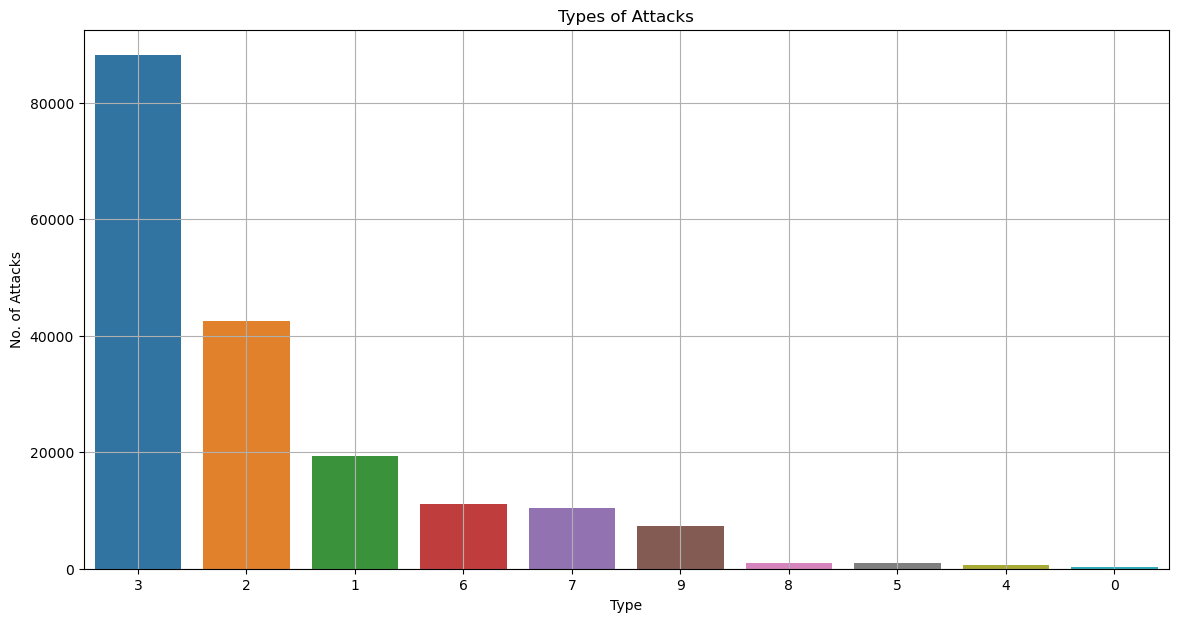

In [32]:
plt.figure(figsize=(14,7))
sns.countplot(x=df['Attack_Type'],order=df['Attack_Type'].value_counts().index)
plt.title('Types of Attacks')
plt.xlabel('Type')
plt.ylabel('No. of Attacks')
plt.grid()
plt.show()

### Most Active Terrorist Groups

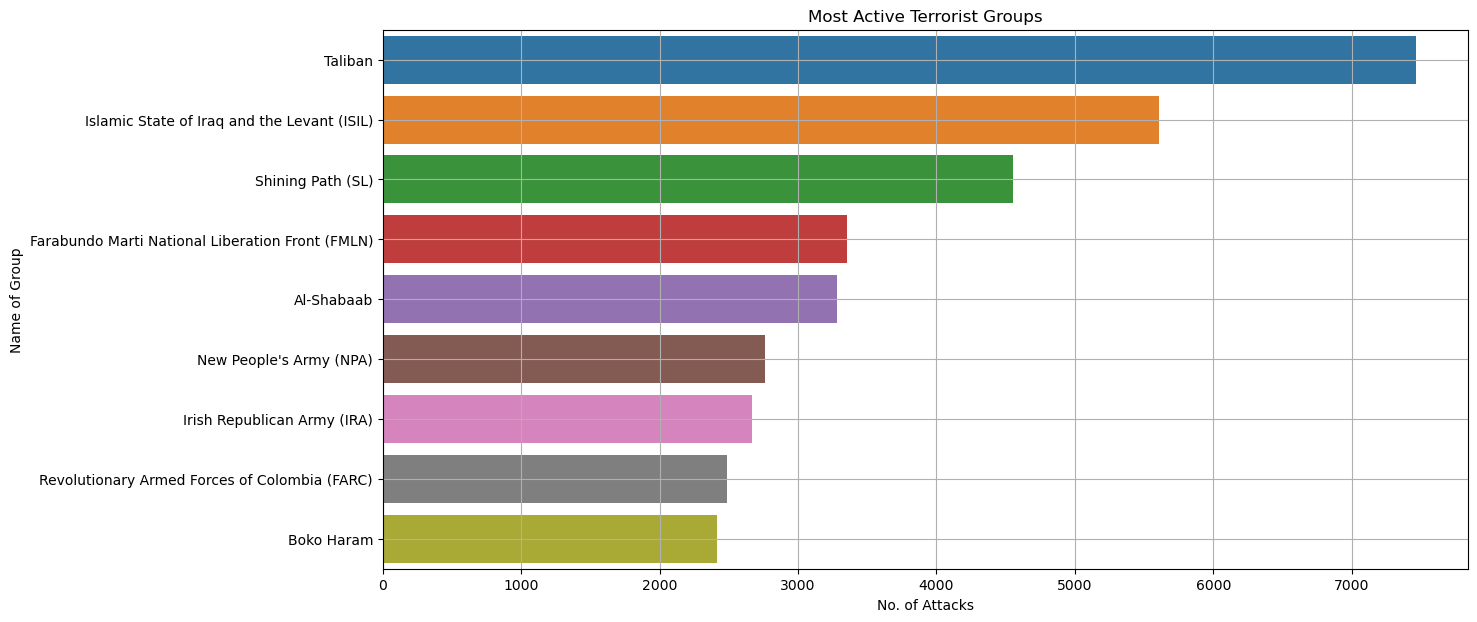

In [33]:
plt.figure(figsize=(14,7))
sns.barplot(x=df['Group'].value_counts()[1:10].values,y=df['Group'].value_counts()[1:10].index)
plt.title('Most Active Terrorist Groups')
plt.ylabel('Name of Group')
plt.xlabel('No. of Attacks')
plt.grid()
plt.show()

### Through our comprehensive Exploratory Data Analysis on global terrorist data, we have unearthed several pivotal insights.

Some of major key findings are as follows:

1. Iran, Pakistan and Afghanistan are the countries facing most terrorist attacks.

2. Baghdad, a state of Iraq, is the state facing most terrorist attacks in the world.

3. Middle East & North Africa are the regions facing most attacks, followed by South Asia and South America

4. In the years 2014-2016, most number of attacks were happened.

5. Taliban and ISIL are the known organisations, who attack the most world wide.

6. Minimum 398058 people were killed between year 1970-2017 

7. Maximum number of people (44450) were killed in year 2014.

8. Minimum number of people (163) were killed in year 1970.

9. Minimum 513125 people were wounded between year 1970-2017

10. Maximum number of people (43899) were wounded in year 2015.

11. Minimum number of people (82) were wounded in year 1971.

#### Conclusion

In conclusion, our exploratory data analysis has provided valuable insights into patterns and trends related to terrorist incidents. We observed that regions like the Middle East & North Africa, South Asia, and South America have experienced the highest number of attacks. The years 2014-2016 saw a surge in terrorist activities. Additionally, organizations like the Taliban and ISIL have been responsible for a significant portion of global attacks. The analysis also revealed the tragic human toll, with hundreds of thousands of people killed or wounded over several decades. These findings underscore the ongoing importance of understanding and addressing the complex issue of terrorism for global security and stability.